### King County, WA housing price analysis
##### Emma Choate, Alex Valencia, & Pete VanZandt
---

> The goal of this project was to take a well-known dataset of 2014-2015 housing sale data from King Co., WA and try to determine the best model for predicting prices based on a variety of predictor variables (features). The technique we used was limited to multiple linear regression, and we were encouraged to only use one model to try to explain the entire dataset. We adopted an iterative modeling approach starting with simple models and advancing to more complicated multiple regression models. This notebook presents our efforts, progressing from correlative screening to model building. Preliminary EDA code can be found in other branches associated with this project repo.

#### Environment setup, data import, & screening

In [1]:
'''load the necessary packages'''

import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, RobustScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.target import FeatureCorrelation
import warnings

In [2]:
# Read in the data
df = pd.read_csv('../../../data/kc_house_data.csv')

In [3]:
# Initial screening for missing values was conducted in other notebooks. 
# Pairwise Pearson product moment correlations helped us understand data relationships and potentially important features.

df.corr().sort_values('price')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
zipcode,-0.008211,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,0.031057,0.085277,0.002888,-0.185771,-0.261570,-0.347210,0.069846,1.000000,0.266742,-0.564259,-0.279299,-0.147294
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
long,0.020672,0.022036,0.132054,0.224903,0.241214,0.230227,0.125943,-0.039864,-0.077894,-0.105877,0.200341,0.344842,0.409993,-0.072156,-0.564259,-0.135371,1.000000,0.335626,0.255586
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.026079,-0.054564,-0.361592,0.447865,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
sqft_lot15,-0.138557,0.082845,0.030690,0.088303,0.184342,0.718204,-0.010722,0.032002,0.073332,-0.003126,0.120981,0.195077,0.070777,0.003852,-0.147294,-0.086139,0.255586,0.183515,1.000000
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.087244,0.100964,-0.061858,0.016669,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002


> The features associated with living space (sqft_living, sqft_above, sqft_living15, bedrooms, bathrooms), condition (grade), and location (view, lat, waterfront) looked promising features to include in the predictive model.

---
### Functions used in this project

#### Linear regression function

In [4]:
'''
The code to run simple and multiple linear regressions was adopted from Joel Collins.
The name stands for "multiple regression model"

'''

def mrmodel(X_train, X_test, y_train, y_test, features):
    '''
    Inputs:
    Takes output from train_test_split (X_train, etc.) AND a list of features to be run by the model.
    
    Implementation:
    To use the function, only change the features & rely on inputs from X_train, etc.
    '''
    # Isolate the features for the model
    model_train = X_train[features]
    model_test = X_test[features]
    
    # Initialize a model
    model = LinearRegression()
    
    # Fit the model
    model.fit(model_train, y_train)
    
    # Generate training and test predictions
    train_preds = model.predict(model_train)
    test_preds = model.predict(model_test)
    
    # Calculate training and test error
    train_error = mean_squared_error(y_train, train_preds, squared=False)
    test_error = mean_squared_error(y_test, test_preds, squared=False)
    
    # return results
    difference = test_error - train_error
    print('train error', train_error)
    print('test error', test_error)
    print(f'difference: {difference}')

    r_sq = model.score(model_train, y_train)
    print('coefficient of determination:', r_sq)
    print('intercept:', model.intercept_)
    model_info = pd.DataFrame([('intercept', model.intercept_)] + list(zip(model_train.columns, model.coef_)), columns=['feature', 'weight'])
    
    print(model_info)
    return model, model_train, model_test
    #note: this produces an array of outputs that need to be indexed in subsequent functions

### residualizer function

In [5]:
'''
The code to plot residual plots & histograms following multiple linear regressions was adopted from Yellowbrick:
https://www.scikit-yb.org/en/latest/api/regressor/residuals.html
this requires the yellowbrick api, which is called by...
from yellowbrick.regressor import ResidualsPlot
'''
def residualizer(model, model_train, model_test, y_train, y_test):
    '''
    Inputs:
    Can either take output from mrmodel (X_train, etc.) or user specified input following the execution of a 
    simple or multiple linear regression.
    
    Implementation:
    To use the function, specify the model named in the LinearRegression step, as well as outputs from the regression,
    including the X_train (called model_train), X_test (called model_test), y_train, and y_test.
    '''
    # Instantiate the visualizer
    visualizer = ResidualsPlot(model, hist = True, qqplot=False)
    visualizer.fit(model_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(model_test, y_test)  # Evaluate the model on the test data
    return visualizer.show()                 # Finalize and render the figure

### plot bins function

In [6]:
'''
This function is designed to break up the target (price, in our case) into a user-defined number of bins (default = 10),
estimate the model residual error (unstandardized), and ploth both the mean and std error of the model error estimates
across each of the bins. This represents model performance across a range of the target, and is helpful in diagnosis.
'''
def plot_bins(model, X, y, bins=10, title='binned error'):
    '''
    Inputs:
    Can either take output from mrmodel (X_train, etc.) or user specified input following the execution of a 
    simple or multiple linear regression.
    
    Implementation:
    To use the function, specify the model named in the LinearRegression step, as well as outputs from the regression,
    including the X and y specified for the initial model.
    '''
    q=pd.qcut(y, bins) #magical pandas function, makes quantiles (10 in this case)
    frame=pd.DataFrame(q) #takes cuts into a df so you can do groupby later
    frame['error']=model.predict(X)-y #estimates error
    frame.columns = ['bins', 'errors'] #reset column names
    avg=frame.groupby('bins').mean()
    avg['std']=frame.groupby('bins').std().iloc[:,0]
    avg.rename(columns={'bins':'mean'}, inplace=True)
    avg.plot(kind='bar', figsize=(15,6), title=title)

### sale_reg function: packages and deploys the previous 3 functions for ease in modeling

In [7]:
'''
This function is designed to deploy all 3 mr functions in one step.
'''
def sale_reg(X_train, X_test, y_train, y_test, features):
    '''
    Inputs:
    Can either take output from mrmodel (X_train, etc.) or user specified input following the execution of a 
    simple or multiple linear regression.
    
    Implementation:
    To use the function, specify the features listed in the LinearRegression step, as well as the X_train, etc. 
    specified for the model.
    '''
    mrmodel_outputs = mrmodel(X_train, X_test, y_train, y_test, features) #saves the 3 outputs of mrmodel
    residualizer(mrmodel_outputs[0], mrmodel_outputs[1], mrmodel_outputs[2], y_train, y_test)
    plot_bins(mrmodel_outputs[0], mrmodel_outputs[2], y_test)
    
    #note the indexing needed to access the output from mrmodel

---
### Model 1: baseline model

> This model uses the feature with highest correlation with the target as a reference (sqft_living) in a simple linear regression.

train error 262419.7884333472
test error 259878.49234916252
difference: -2541.2960841846652
coefficient of determination: 0.4886786453279144
intercept: -47377.18949402089
       feature        weight
0    intercept -47377.189494
1  sqft_living    281.862853


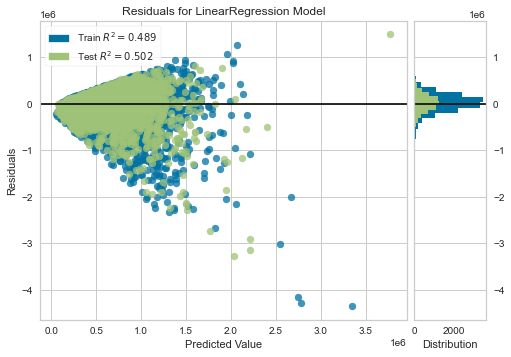

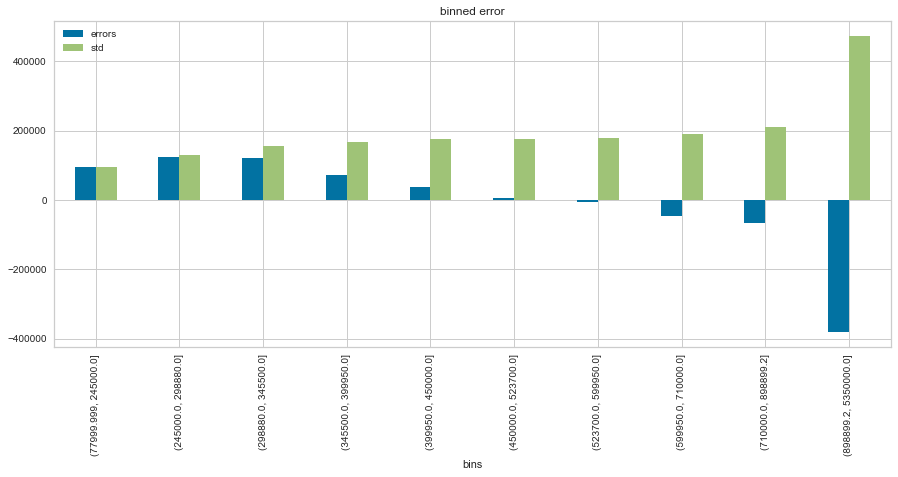

In [8]:
#set X & y variables
X = df.drop(['price'], axis = 1)
y = df['price']

#establish the features list
model_features = ['sqft_living']

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021)

#call the function (rename the output file every time)
model_1_results = sale_reg(X_train, X_test, y_train, y_test, model_features)
model_1_results

> The results suggest a poor fit of the model and a high error - especially at high price ranges. The residual plot indicates strong heteroscedasticity of the data. Note that train and test error are represented throughout this notebook as RMSE.

### Data preparation: modify data for models by calculating basement area

In [9]:
#make a new copy of the df for manipulation
df_2 = df.copy()

In [10]:
# modify basement area to be = to total living area - above living area
df_2['sqft_basement'] = df_2['sqft_basement'].str.replace('?', '0')
df_2[['sqft_basement']] = df_2[['sqft_basement']].apply(pd.to_numeric)
df_2['area_basement'] = df_2['sqft_living']-df_2['sqft_above']

---

### Model 2: all numerical features

>This version of the model includes 12 features that we thought would most likely be important for house prices. 
This includes treating zipcode as a numeric (changed in later models).

train error 226809.3163724381
test error 225347.17138654357
difference: -1462.144985894527
coefficient of determination: 0.6180358986328702
intercept: -3908662.141204477
          feature        weight
0       intercept -3.908662e+06
1        bedrooms -5.535659e+04
2       bathrooms  5.299249e+04
3     sqft_living  1.236013e+02
4        sqft_lot -3.758423e-03
5          floors  3.318063e+04
6       condition  1.906736e+04
7           grade  1.251580e+05
8      sqft_above  4.798106e+01
9        yr_built -3.918297e+03
10        zipcode  1.096098e+02
11  sqft_living15  3.206107e+01
12     sqft_lot15 -5.386288e-01
13  area_basement  7.562026e+01


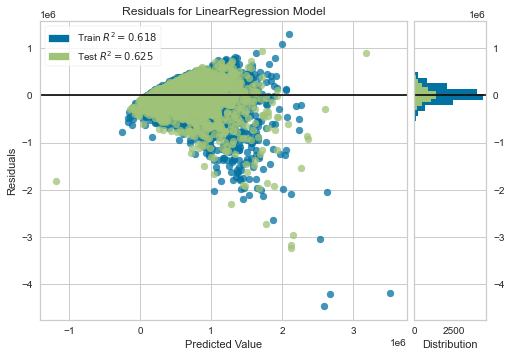

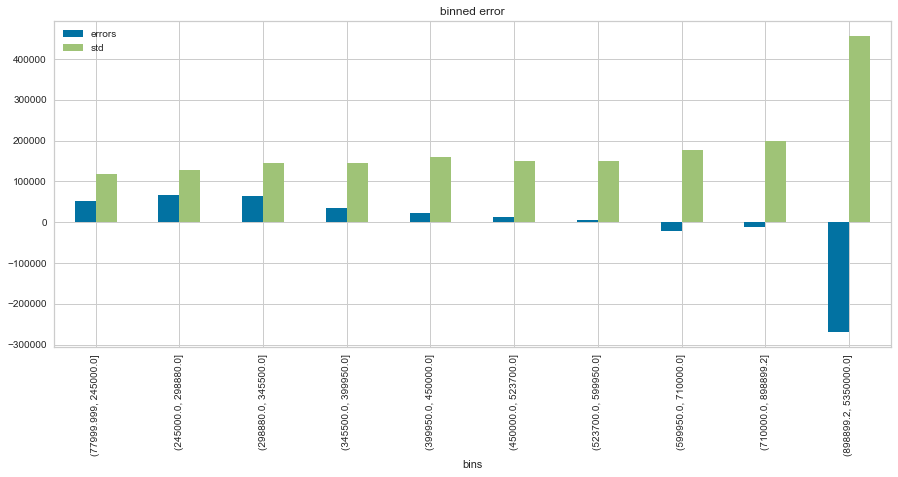

In [11]:
#set X & y variables
X = df_2.drop(['price'], axis = 1)
y = df_2['price']

#establish the features list
model_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'area_basement']

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021)

#call the function (rename the output file every time)
model_2_results = sale_reg(X_train, X_test, y_train, y_test, model_features)
model_2_results

> The results suggest an improved fit of the model and a lower error, but the error at high price ranges persists. The residual plot still indicates strong heteroscedasticity of the data.

---
### Model 3: scaled predictors from model 2

> Here, we used the same features as in the previous model, but only after scaling them using RobustScaler.

In [12]:
#set predictors by dropping these variables
X_train_pared = X_train.drop(['id', 'date', 'waterfront', 'view', 'sqft_basement', 'lat', 'long', 'yr_renovated'], axis = 1)
X_test_pared = X_test.drop(['id', 'date', 'waterfront', 'view', 'sqft_basement', 'lat', 'long', 'yr_renovated'], axis = 1)

In [13]:
#scale training data
scaler = RobustScaler() #there are other options
scaler.fit(X_train_pared) #do this in first step w/ only train data
X_train = scaler.transform(X_train_pared) 

In [14]:
# Scale the test set, with same scalar
X_test = scaler.transform(X_test_pared)

In [15]:
X_train = pd.DataFrame(X_train, columns=X_train_pared.columns) 
#needed for scaled data to make it accessible to the function
X_test = pd.DataFrame(X_test, columns=X_test_pared.columns)

In [16]:
model_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'area_basement']

train error 226809.31637243807
test error 225347.17138654666
difference: -1462.144985891413
coefficient of determination: 0.6180358986328702
intercept: 394573.7861123688
          feature         weight
0       intercept  394573.786112
1        bedrooms  -55356.591804
2       bathrooms   39744.370407
3     sqft_living  103992.962378
4        sqft_lot     -21.084755
5          floors   33180.625389
6       condition   19067.363753
7           grade  125157.986456
8      sqft_above   80306.146732
9        yr_built -172405.050456
10        zipcode    9207.225669
11  sqft_living15   28213.738820
12     sqft_lot15   -2658.133008
13  area_basement   60631.312625


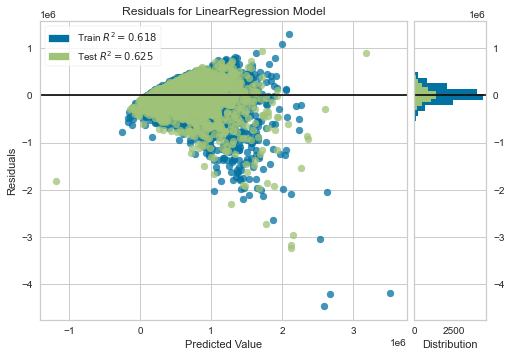

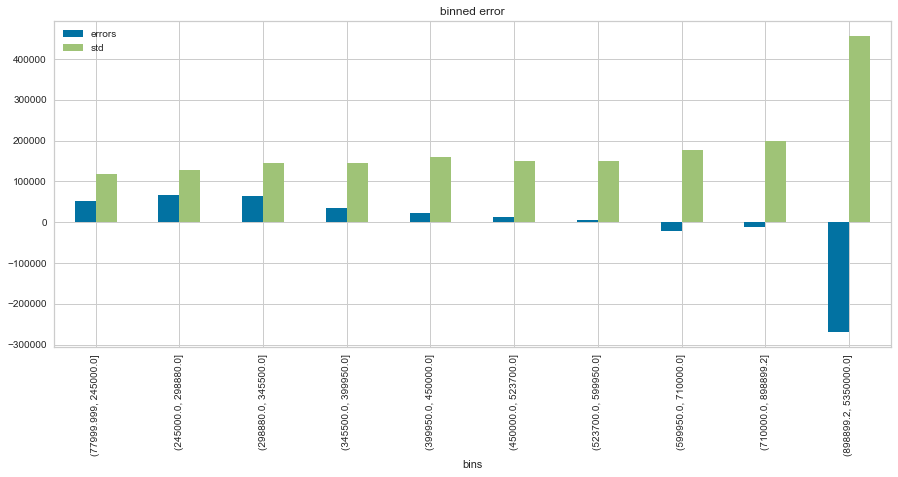

In [17]:
#call the function (rename the output file every time)
model_3_results = sale_reg(X_train, X_test, y_train, y_test, model_features)
model_3_results

> Scaling appears to have no impact on the results or residuals.

---
### Model 4: re-run model 3 (scaled), but with log price as target

> Price data are extremely right-skewed and the residuals plots show increasing variation in price with higher values of the target. Therfore, this model uses a log transformed target to address these issues.

In [18]:
#use a fresh copy of the df
df_3 = df_2.copy()
df_3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,area_basement
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,400
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,910
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [19]:
#log transform the target
df_3['log_price'] = np.log(df_3['price'])

In [20]:
#set X & y variables
X = df_3.drop(['price', 'log_price'], axis = 1)
y = df_3['log_price']

In [21]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021)

In [22]:
model_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'area_basement']

train error 0.31121938746476135
test error 0.315555653695869
difference: 0.004336266231107666
coefficient of determination: 0.6484449290050489
intercept: -22.72003643231573
          feature        weight
0       intercept -2.272004e+01
1        bedrooms -3.201299e-02
2       bathrooms  8.199559e-02
3     sqft_living  1.060594e-04
4        sqft_lot  1.971076e-07
5          floors  1.228671e-01
6       condition  4.559304e-02
7           grade  2.121982e-01
8      sqft_above  3.728417e-06
9        yr_built -5.521141e-03
10        zipcode  4.499261e-04
11  sqft_living15  1.189385e-04
12     sqft_lot15 -3.774963e-07
13  area_basement  1.023310e-04


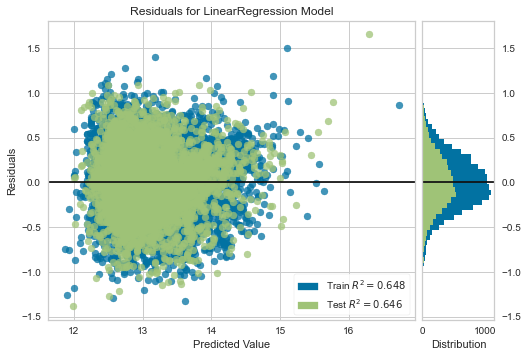

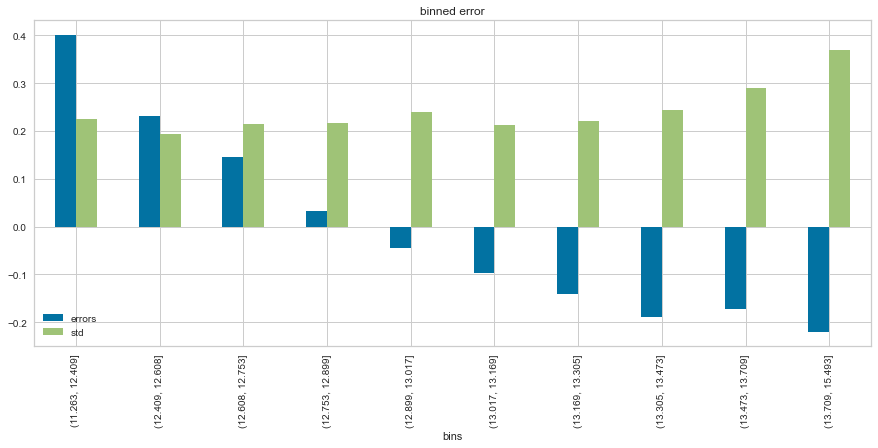

In [23]:
#call the function (rename the output file every time)
model_4_results = sale_reg(X_train, X_test, y_train, y_test, model_features)
model_4_results

> The train and test errors, residuals, and binned errors are quantitatively incomparable to prior models because of the log transformation. However, there is only a small increase in the r^2, suggesting that this transformation is marginally helpful, but at a cost to interpretability to the user. Therefore, the rest of our models use untransformed price as the target.

---
### Model5: simplified model 2 w/ fewer features

> Here, we attempted to remove some features to trim down the model by removing 3 features that did not seem to make large contributions to previous models. We wanted to see the impact of removing these features on the model's predictive power.

train error 227518.65418879347
test error 226215.79849525375
difference: -1302.855693539721
coefficient of determination: 0.6156430052027546
intercept: -3600607.543274485
       feature        weight
0    intercept -3.600608e+06
1     bedrooms -5.505154e+04
2    bathrooms  5.550395e+04
3  sqft_living  1.907550e+02
4     sqft_lot -2.561308e-01
5       floors  2.222916e+04
6    condition  1.946120e+04
7        grade  1.298941e+05
8     yr_built -3.956716e+03
9      zipcode  1.072529e+02


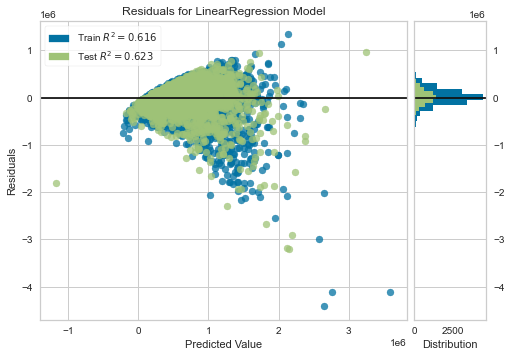

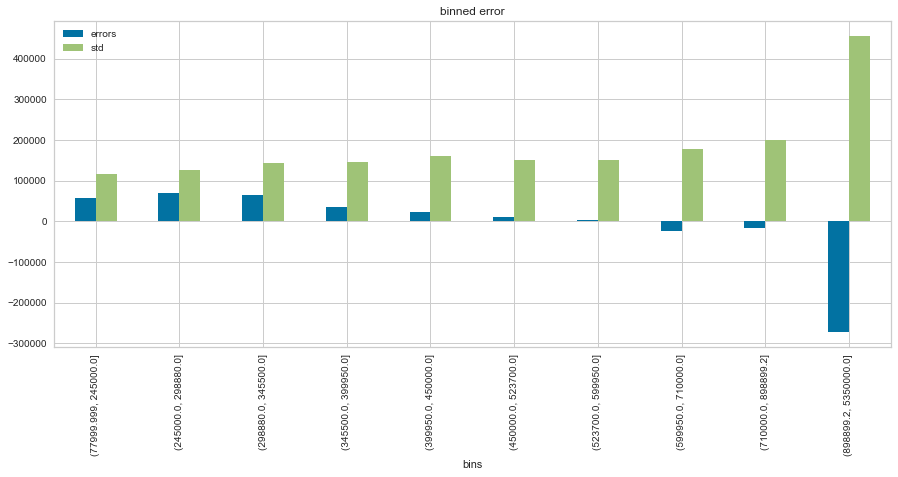

In [24]:
#set X & y variables
X = df_2.drop(['price'], axis = 1)
y = df_2['price']

#establish the features list
model_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'yr_built', 'zipcode']

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021)

#call the function (rename the output file every time)
model_2_results = sale_reg(X_train, X_test, y_train, y_test, model_features)
model_2_results

> This simpler model results in poorer performance, suggesting that the final model will probably need at least 12 features.

---
### Model6: feature engineered interactions

> An iterative evaluation of all possible 2-way combinations of numerical features indicated that adding new interaction features had potential for increasing the explanatory power of the model. 

In [25]:
#new df to work with given new features
df_3 = df_2.copy()

In [26]:
# feature engineering of interactions. See Emma Choate's branch for code to screen these interactions.
df_3['living*bath'] = df_3['sqft_living']*df_3['bathrooms']
df_3['living*grade'] = df_3['sqft_living']*df_3['grade']
df_3['grade*bath'] = df_3['grade']*df_3['bathrooms']
df_3.view = df_3.view.replace(np.nan, 0)
df_3.waterfront = df_3.waterfront.replace(np.nan, 0)
#df_3.head()

In [27]:
#set X & y variables
X = df_3.drop(['price'], axis = 1)
y = df_3['price']

In [28]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021)

train error 187242.47643603454
test error 188290.74265648978
difference: 1048.2662204552325
coefficient of determination: 0.7396788095674223
intercept: 8900706.742211593
          feature        weight
0       intercept  8.900707e+06
1        bedrooms -1.212653e+04
2       bathrooms -7.158496e+03
3     sqft_living -1.613017e+02
4        sqft_lot  4.212476e-02
5          floors  4.305385e+04
6       condition  3.462466e+04
7           grade  1.768478e+04
8      sqft_above -8.927252e+01
9        yr_built -2.276464e+03
10        zipcode -5.562567e+02
11  sqft_living15  3.663995e+01
12     sqft_lot15 -3.275387e-01
13  area_basement -7.202915e+01
14     grade*bath -1.905096e+02
15   living*grade  3.630921e+01
16    living*bath  2.587920e+01
17            lat  5.962597e+05
18     waterfront  5.711090e+05
19           long -1.780575e+05
20           view  4.819872e+04


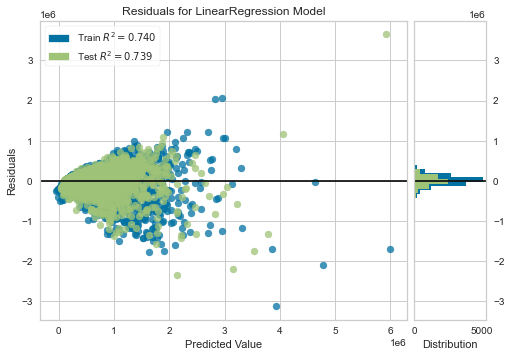

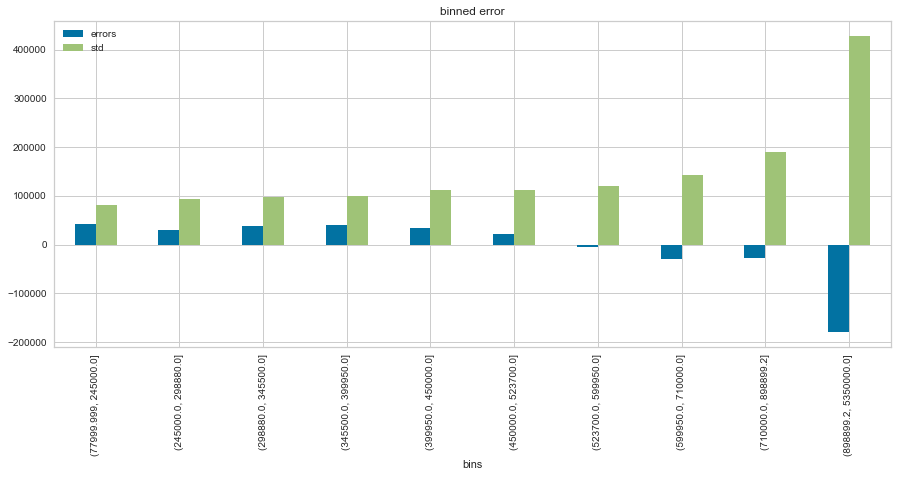

In [29]:
model_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'area_basement', 'grade*bath', 
        'living*grade', 'living*bath', 'lat', 'waterfront', 'long', 'view']

model_6_results = sale_reg(X_train, X_test, y_train, y_test, model_features)
model_6_results

> Including these interactions substantially improved the performance of the model by increasing the amount of variance it explained (r^2), reducing train & test error, and reducing some of the heteroscedacity of the residuals (though not all). Clearly, our final model will have to include interaction terms.

---
### Model 7: polynomial model

> For this model, we implemented the PolynomialFeatures method for including all 1-way features and their squared terms, as well as all 2-way interaction terms. 

In [30]:
#make a new df to work with
df_4 = df_3.copy()
df_4 = df_4.drop(['id', 'date', 'yr_renovated'], axis=1)

#set X & y variables
X = df_4.drop(['price'], axis = 1)
y = df_4['price']

In [31]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021)

> This process has to be a bit different - doesn't use sale_reg function, since sale_reg only performs a linear regr'n

In [32]:
# Instantiate PolynomialFeatures
poly = PolynomialFeatures(2)

# Fit and transform X_train
X_poly_fit = poly.fit(X_train)
X_poly_train = poly.transform(X_train)
feature_choice = poly.get_feature_names(df_4.columns)
    
# Instantiate and fit a linear regression model to the polynomial transformed train features
reg_poly = LinearRegression().fit(X_poly_train, y_train)
    
# Transform the test data into polynomial features
X_poly_test = poly.transform(X_test)
    
# Get predicted values for transformed polynomial test data  
y_pred = reg_poly.predict(X_poly_test)
    
# Evaluate model performance on test data
r_sq = r2_score(y_test, y_pred)
    
# Transform the full data
X_poly = poly.transform(X)
    
# Now, we want to see what the model predicts for the entire data  
y_poly = reg_poly.predict(X_poly)

In [33]:
#interpret the error & fit of the model
train_preds = reg_poly.predict(X_poly_train)
test_preds = reg_poly.predict(X_poly_test)

train_error = mean_squared_error(y_train, train_preds, squared=False)
test_error = mean_squared_error(y_test, test_preds, squared=False)
print('train error', train_error)
print('test error', test_error)
difference = test_error - train_error
print(f'difference: {difference}')

print('coefficient of determination:', r_sq)
print('intercept:', reg_poly.intercept_)
#intercept: 5.633333333333329
#print('slopes:', reg_poly.coef_) #note that these terms were not reported here for brevity

train error 147269.19903609788
test error 165436.39187948158
difference: 18167.192843383702
coefficient of determination: 0.7981412622564863
intercept: 22729406692.754795


In [34]:
len(feature_choice)
# there were 253 total terms created by the PolynomialFeatures(2) model

253

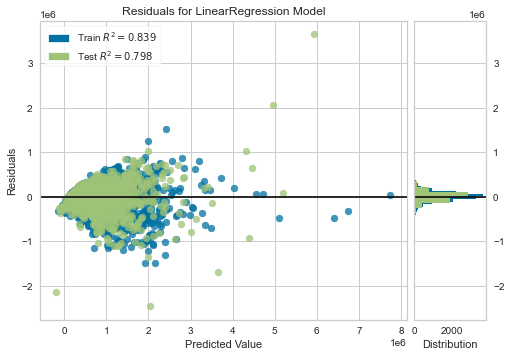

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [35]:
# Instantiate the visualizer
visualizer = ResidualsPlot(reg_poly)
visualizer.fit(X_poly_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_poly_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

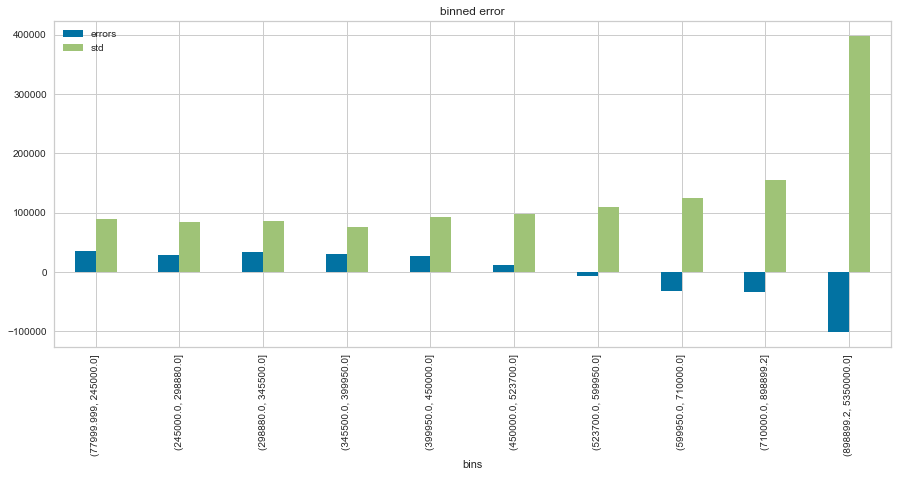

In [36]:
#Plot bins here
np.reshape(feature_choice, (-1, 1)) 
plot_bins(reg_poly, X_poly_test, y_test)

> The performance of this polynomial model is improved in terms of train error, residuals, binned error, and r^2. However, the large difference between the train & test data suggests problematic overfitting caused by an excessive number of terms in the final model (253). The remaining residuals (mainly in the test data) suggest that model fit could be improved and test error could be reduced if these residuals were eliminated.

In [37]:

X_train['price'] = y
X_train['resid'] = np.abs(y_train-train_preds)
X_train.loc[X_train['resid'] > 1300000]

<ipython-input-37-35d3ce10b81e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['price'] = y
<ipython-input-37-35d3ce10b81e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['resid'] = np.abs(y_train-train_preds)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,lat,long,sqft_living15,sqft_lot15,area_basement,living*bath,living*grade,grade*bath,price,resid
16288,4,3.50,5550,28078,2.0,0.0,2.0,4,12,3350,...,47.6395,-122.234,2980,19602,2200,19425.0,66600,42.0,3710000.0,1.319351e+06
21034,5,6.00,7120,40806,2.0,0.0,4.0,3,12,5480,...,47.5451,-122.114,3440,36859,1640,42720.0,85440,72.0,900000.0,1.514088e+06
10435,4,4.00,4260,11765,2.0,0.0,0.0,3,11,3280,...,47.6380,-122.288,4260,10408,980,17040.0,46860,44.0,3400000.0,1.489952e+06
18467,5,3.75,5020,8694,2.0,0.0,1.0,3,12,3970,...,47.6146,-122.213,4190,11275,1050,18825.0,60240,45.0,3650000.0,1.497890e+06


In [38]:
#access the previous X_test, etc. to idenfity residuals in the X_test data
X_test['price'] = y
X_test['resid'] = np.abs(y_test-test_preds) #makes new column of residuals in full df so you can see house characteristics
X_test['predicted_value'] = np.abs(test_preds) #new col of test preds
X_test.loc[X_test['resid'] > 2000000]


<ipython-input-38-ad1e8b10f93d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['price'] = y
<ipython-input-38-ad1e8b10f93d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['resid'] = np.abs(y_test-test_preds) #makes new column of residuals in full df so you can see house characteristics
<ipython-input-38-ad1e8b10f93d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,long,sqft_living15,sqft_lot15,area_basement,living*bath,living*grade,grade*bath,price,resid,predicted_value
11859,4,3.25,7420,167869,2.0,0.0,3.0,3,12,7420,...,-121.764,5610,169549,0,24115.0,89040,39.00,1950000.0,2.133863e+06,1.838628e+05
8629,4,3.00,6430,27517,2.0,0.0,0.0,3,12,6430,...,-122.219,3720,14592,0,19290.0,77160,36.00,4490000.0,2.460985e+06,2.029015e+06
14542,5,6.25,8670,64033,2.0,0.0,4.0,3,13,6120,...,-122.372,4140,81021,2550,54187.5,112710,81.25,2890000.0,2.061800e+06,4.951800e+06
12764,7,8.00,13540,307752,3.0,0.0,4.0,3,12,9410,...,-121.986,4850,217800,4130,108320.0,162480,96.00,2280000.0,3.646494e+06,5.926494e+06


---
### Model 7a: the polynomial model (253 features) dropping 9 extreme residuals

> Above, we identified 9 extreme residuals in both the train and test datasets to examine their impact on the model's performance. We examined several of these observations, and although they're irregular (extremely high or low prices, relative to comparables), we did not feel justified in removing them from the final model. This removal was only to examine their impact on the model's performance.

In [39]:
#make a new df to work with 
df_4a = df_4.copy()
df_4a.drop(index = [17805, 3523, 10435, 1919, 8629, 16288, 18467, 12764, 21034], inplace=True)

#set X & y variables
X = df_4a.drop(['price'], axis = 1)
y = df_4a['price']


In [40]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021)

In [41]:
# this process has to be a bit different - doesn't use sale_reg function, since we're using a polynomial again

# Instantiate PolynomialFeatures
poly = PolynomialFeatures(2)

# Fit and transform X_train
X_poly_fit = poly.fit(X_train)
X_poly_train = poly.transform(X_train)
feature_choice = poly.get_feature_names(df_4.columns)
    
# Instantiate and fit a linear regression model to the polynomial transformed train features
reg_poly = LinearRegression().fit(X_poly_train, y_train)
    
# Transform the test data into polynomial features
X_poly_test = poly.transform(X_test)
    
# Get predicted values for transformed polynomial test data  
y_pred = reg_poly.predict(X_poly_test)
    
# Evaluate model performance on test data
r_sq = r2_score(y_test, y_pred)
    
# Transform the full data
X_poly = poly.transform(X)
    
# Now, we want to see what the model predicts for the entire data  
y_poly = reg_poly.predict(X_poly)

In [42]:
#interpret the error & fit of the model
train_preds = reg_poly.predict(X_poly_train)
test_preds = reg_poly.predict(X_poly_test)

train_error = mean_squared_error(y_train, train_preds, squared=False)
test_error = mean_squared_error(y_test, test_preds, squared=False)
print('train error', train_error)
print('test error', test_error)
difference = test_error - train_error
print(f'difference: {difference}')

print('coefficient of determination:', r_sq)
print('intercept:', reg_poly.intercept_)
#intercept: 5.633333333333329
#print('slopes:', reg_poly.coef_)

train error 144894.7781840365
test error 155990.84915000355
difference: 11096.070965967054
coefficient of determination: 0.8234707237857166
intercept: 33710320670.916935


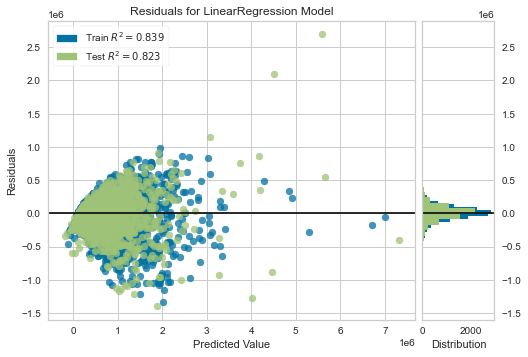

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [43]:
# Instantiate the visualizer
visualizer = ResidualsPlot(reg_poly)
visualizer.fit(X_poly_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_poly_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

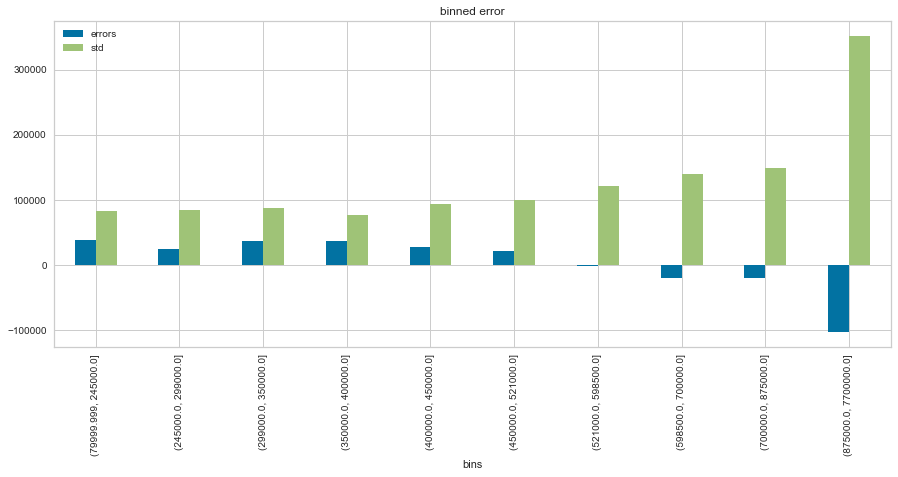

In [44]:
#Plot bins here
np.reshape(feature_choice, (-1, 1)) 
plot_bins(reg_poly, X_poly_test, y_test)

> As expected, the model's performance is substantially improved by all metrics. However, post-hoc deletion of records did not seem justifiable in the final recommended model.

---
### Model 8: including OneHotEncoded zip codes saved as municipalities

> Here, we accessed zip codes from King County (https://data.kingcounty.gov/), associated them with municipalities (Seattle, Bellevue, Renton, etc.), and OneHotEncoded municipalities to try to capture information about the effect of location on house prices. Municipality data was combined with our top-choice model so far (Model 6), which included interaction terms.

In [45]:
#read in the data
path = '../../../data/King_co_zipcodes.csv'

zip_code_names = pd.read_csv(path)

In [46]:
#Merge spreadsheet with original DataFrame
df_merge = pd.merge(df_3, zip_code_names, on='zipcode')
df_merge

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,area_basement,living*bath,living*grade,grade*bath,municipality,population
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,47.5112,-122.257,1340,5650,0,1180.0,8260,7.00,Seattle,24092
1,4060000240,6/23/2014,205425.0,2,1.00,880,6780,1.0,0.0,0.0,...,47.5009,-122.248,1190,6780,0,880.0,5280,6.00,Seattle,24092
2,4058801670,7/17/2014,445000.0,3,2.25,2100,8201,1.0,0.0,2.0,...,47.5091,-122.244,2660,8712,480,4725.0,16800,18.00,Seattle,24092
3,2976800796,9/25/2014,236000.0,3,1.00,1300,5898,1.0,0.0,0.0,...,47.5053,-122.255,1320,7619,0,1300.0,9100,7.00,Seattle,24092
4,6874200960,2/27/2015,170000.0,2,1.00,860,5265,1.0,0.0,0.0,...,47.5048,-122.272,1650,8775,0,860.0,5160,6.00,Seattle,24092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2525049086,10/3/2014,2720000.0,4,3.25,3990,18115,2.0,0.0,0.0,...,47.6177,-122.229,3450,16087,0,12967.5,43890,35.75,Medina,2971
21593,2525049113,7/25/2014,1950000.0,4,3.50,4065,18713,2.0,0.0,0.0,...,47.6209,-122.237,3070,18713,0,14227.5,40650,35.00,Medina,2971
21594,3262300485,4/21/2015,2250000.0,5,5.25,3410,8118,2.0,0.0,0.0,...,47.6295,-122.236,3410,16236,0,17902.5,37510,57.75,Medina,2971
21595,6447300365,11/13/2014,2900000.0,5,4.00,5190,14600,2.0,0.0,1.0,...,47.6102,-122.225,3840,19250,0,20760.0,57090,44.00,Medina,2971


In [47]:
# OneHotEncoder and new dataframe df_ohe
ohe = OneHotEncoder(sparse=False)
df_ohe = pd.DataFrame(ohe.fit_transform(df_merge[['municipality']]), columns=ohe.get_feature_names(), index=df_3.index)

df_5 = pd.concat([df_3.drop('zipcode', axis=1), df_ohe], axis=1)

In [48]:
#new df to work with given new features
df_5 = df_5.drop(['id', 'date', 'yr_renovated'], axis=1)

In [49]:
#set X & y variables
X = df_5.drop(['price'], axis = 1)
y = df_5['price']

In [50]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'area_basement', 'living*bath', 'living*grade',
       'grade*bath', 'x0_Auburn', 'x0_Bellevue', 'x0_Black Diamond',
       'x0_Bothell', 'x0_Carnation', 'x0_Duvall', 'x0_Enumclaw',
       'x0_Fall City', 'x0_Federal Way', 'x0_Issaquah', 'x0_Kenmore',
       'x0_Kent', 'x0_Kirkland', 'x0_Maple Valley', 'x0_Medina',
       'x0_Mercer Island', 'x0_North Bend', 'x0_Redmond', 'x0_Renton',
       'x0_Sammamish', 'x0_Seattle', 'x0_Snoqualmie', 'x0_Vashon',
       'x0_Woodinville'],
      dtype='object')

In [51]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021)

train error 188339.06526292983
test error 190695.72440435935
difference: 2356.6591414295253
coefficient of determination: 0.736620729685546
intercept: -32211412.77361748
             feature        weight
0          intercept -3.221141e+07
1           bedrooms -1.049563e+04
2          bathrooms  6.707231e+03
3        sqft_living -7.284691e+10
4           sqft_lot  3.744311e-02
5             floors  3.582105e+04
6         waterfront  5.756428e+05
7               view  4.533571e+04
8          condition  3.849443e+04
9              grade  2.142427e+04
10        sqft_above  7.284691e+10
11     sqft_basement  5.091263e+01
12          yr_built -2.176346e+03
13               lat  5.555331e+05
14              long -8.186030e+04
15     sqft_living15  4.175238e+01
16        sqft_lot15 -3.341991e-01
17     area_basement  7.284691e+10
18       living*bath  2.630015e+01
19      living*grade  3.712959e+01
20        grade*bath -1.978006e+03
21         x0_Auburn  2.342660e+03
22       x0_Bellevue  1.3

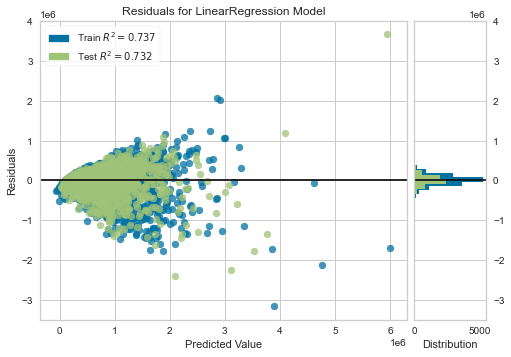

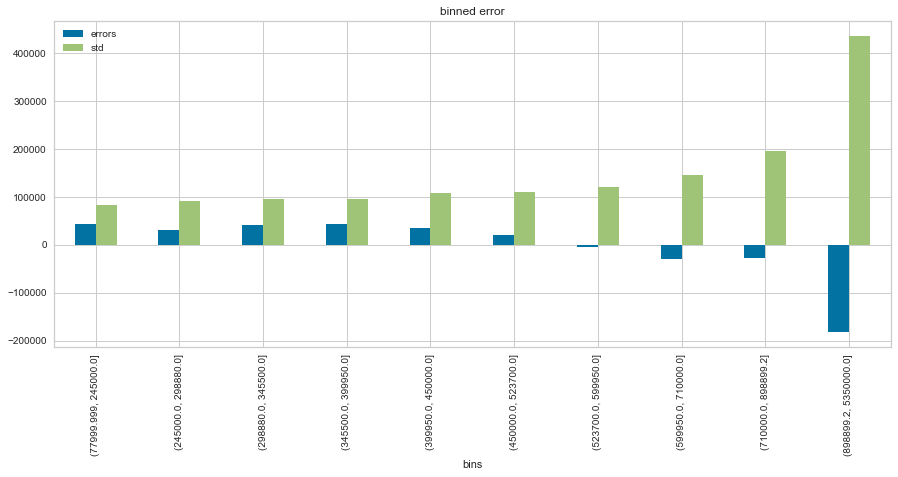

In [52]:
model_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'area_basement', 'living*bath', 'living*grade',
       'grade*bath', 'x0_Auburn', 'x0_Bellevue', 'x0_Black Diamond',
       'x0_Bothell', 'x0_Carnation', 'x0_Duvall', 'x0_Enumclaw',
       'x0_Fall City', 'x0_Federal Way', 'x0_Issaquah', 'x0_Kenmore',
       'x0_Kent', 'x0_Kirkland', 'x0_Maple Valley', 'x0_Medina',
       'x0_Mercer Island', 'x0_North Bend', 'x0_Redmond', 'x0_Renton',
       'x0_Sammamish', 'x0_Seattle', 'x0_Snoqualmie', 'x0_Vashon',
       'x0_Woodinville']

model_8_results = sale_reg(X_train, X_test, y_train, y_test, model_features)
model_8_results

> Including zip codes as municipalities did not result in increased improvement over Model 6.

---
### Model 9: iterative modeling to remove poor predictors and simplify model

> In our final model, we attempted to remove the features with the lowest predictive power from Model 6 to see if we could make a more interpretable model while still retaining adequate explanatory power (r^2 > 0.7).

In [53]:
#set X & y variables
# ~~~~~~~~~~~~based on model 6 & df_3~~~~~~~~~~~~~~~~

X = df_3.drop(['price'], axis = 1)
y = df_3['price']

In [54]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021)

train error 191327.7709876513
test error 190102.54411773905
difference: -1225.226869912265
coefficient of determination: 0.7281954061370903
intercept: 11894905.304711606
        feature        weight
0     intercept  1.189491e+07
1      bedrooms -1.840963e+04
2     bathrooms -4.257554e+05
3   sqft_living  1.356097e+02
4        floors  3.001725e+04
5     condition  3.383722e+04
6         grade -3.348438e+04
7      yr_built -2.250767e+03
8       zipcode -6.038418e+02
9    grade*bath  6.078697e+04
10          lat  6.081349e+05
11   waterfront  5.855069e+05
12         long -1.891787e+05
13         view  5.223567e+04


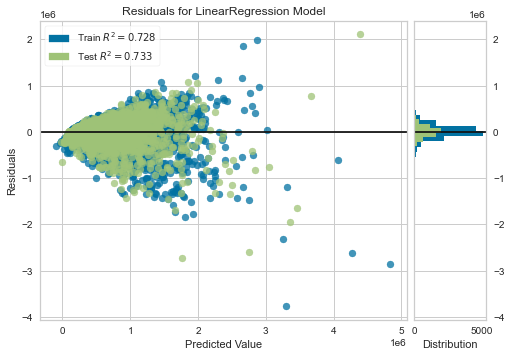

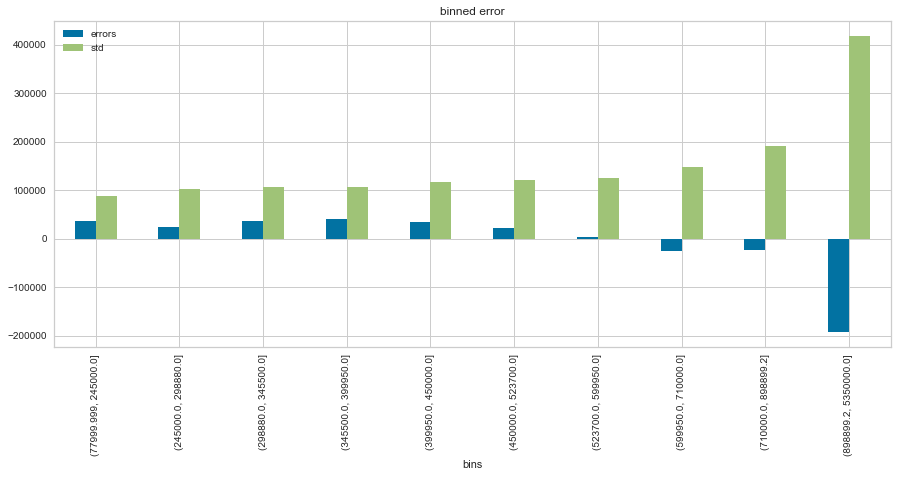

In [55]:
model_features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade', 'yr_built', 'zipcode', 'grade*bath', 
         'lat', 'waterfront', 'long', 'view']
#remove 'living*grade', 'living*bath', 'sqft_lot15', 'sqft_living15', 'sqft_lot', 'area_basement', 'sqft_above', 
model_9_results = sale_reg(X_train, X_test, y_train, y_test, model_features)
model_9_results

> This model resulted in similar performance with only 13 features. Below, we order these features in terms of impact.

In [56]:
results=[[0,'intercept',1.189491e+07],
[1,'bedrooms',-1.840963e+04],
[2,'bathrooms',-4.257554e+05],
[3,'sqft_living',1.356097e+02],
[4,'floors',3.001725e+04],
[5,'condition',3.383722e+04],
[6,'grade',-3.348438e+04],
[7,'yr_built',-2.250767e+03],
[8,'zipcode',-6.038418e+02],
[9,'grade*bath',6.078697e+04],
[10,'lat',6.081349e+05],
[11,'waterfront',5.855069e+05],
[12,'long',-1.891787e+05],
[13,'view',5.223567e+04]]

results_df = pd.DataFrame(results, columns = ['index', 'feature', 'weight'])

In [57]:
results_df.sort_values('weight', inplace=True)
results_df = results_df[results_df.feature != 'intercept']

<AxesSubplot:xlabel='feature'>

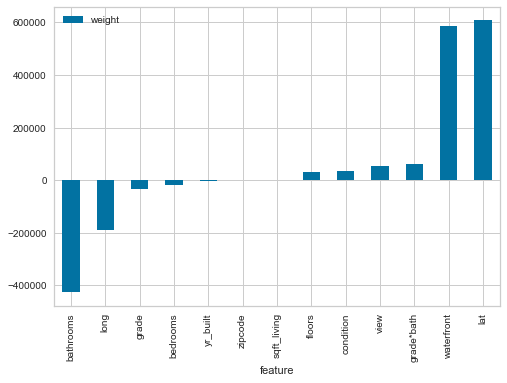

In [58]:
results_df.plot.bar(x='feature', y='weight')

> The final model suggests that features associated with location (latitude, longitude, waterfront access) and the number of bathrooms have the biggest impact on the predictive power of the model.

---
### Interpretation, key points, and conclusions

> The model that included 3 key interactions (Model 6) performed the best overall, with an r^2 of 0.74, train error (RMSE) of 187242, 
and a test error of 188290. While these values are fairly large, the relatively small difference of 1048 suggests that the model is not overfit. There is still considerable variation left to be explained by the model, but we were unable to improve model performance substantially without the inclusion of excessive numbers of terms or additional feature engineering. Our goal was to balance predictive power with interpretability, and we feel we have achieved this balance with the interactions model (Model 6). Model 9 is even more streamlined and interpretable, with only a 0.2 reduction in the amount of explained variance. 

> In our final two recommended models (6 and 9), the highest influence features are associated with location (latitude, longitude, waterfront access) and the number of bathrooms. Of the initial predictors that looked most promising in our pairwise comparisons - features associated with living space (sqft_living, sqft_above, sqft_living15, bedrooms, bathrooms), condition (grade), and location (view, lat, waterfront) - very few retained strong influence in the final model. This is initially confusing, since they seemed like features that are obviously important in selecting a home (e.g., house size, number of bedrooms, house condition). However, the positive relationships between these variables and the target were better explained by other features in our model, which meant that the influence of the initially obvious features was substantially diminished. The negative relationship of bathrooms and price also makes sense in this light, since it holds explanatory power only once other factors have explained a large proportion of total variance.

> In future efforts, we think that a nonlinear modeling approach might produce better explanatory power. Another approach that would likely increase the predictability of housing prices would be to use a stepwise model with breakpoints where the linear functions change slope or possibly to break up house prices into categories and modeling prices within each of these categories.

---
#### Appendix
> Additional code for screening, data exploration, and a function sandbox can be found in ancillary branches associated with this project.
---
---